# Linear Regression
> Supervised Learning
> Regression -> Linear Regression e.g -> Predict price of the house based on size of the house (continuous data) x: size y: price
> x -> y | y is dependant on x
> Making predictions based on y = mx + b

### How to
> Start py using a hypothesis function f(x) = O.x

In [16]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [2]:
data = pd.read_csv('student/student-mat.csv', sep=';')
data.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freet

In [10]:
data.shape

(395, 33)

In [5]:
# Trim data
data = data[['G1', 'G2','G3', 'studytime', 'failures', 'absences']]
data.head

<bound method NDFrame.head of      G1  G2  G3  studytime  failures  absences
0     5   6   6          2         0         6
1     5   5   6          2         0         4
2     7   8  10          2         3        10
3    15  14  15          3         0         2
4     6  10  10          2         0         4
..   ..  ..  ..        ...       ...       ...
390   9   9   9          2         2        11
391  14  16  16          1         0         3
392  10   8   7          1         3         3
393  11  12  10          1         0         0
394   8   9   9          1         0         5

[395 rows x 6 columns]>

In [16]:
data.columns

Index(['G1', 'G2', 'G3', 'studytime', 'failures', 'absences'], dtype='object')

In [17]:
for col in data.columns:
    print(col)

G1
G2
G3
studytime
failures
absences


In [4]:
# Predict G3, we want to predict G3 based on the other attributes
predict = 'G3'

In [7]:
# slope m  = y2 - y1 / x2 - x1
X = np.array(data.drop([predict], 1))
y = np.array(data[predict])
# Taking all of our attributes and labels and split them into 4 arrays
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [11]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
accuracy = linear.score(x_test, y_test)
accuracy

0.6375097633111493

In [10]:
print(f'Coefficient: {linear.coef_}')
print(f'Intercept: {linear.intercept_}')

Coefficient: [ 0.1839977   0.9420077  -0.09615882 -0.4299051   0.03711951]
Intercept: -1.5900787952671713


In [13]:
# Predict student information
predictions = linear.predict(x_test)

for i in range(len(predictions)):
    print(round(predictions[i], 2), x_test[i], y_test[i])

12.75 [12 13  2  0  2] 13
8.05 [ 9  9  2  2 15] 9
14.12 [15 14  4  0  4] 14
12.93 [13 13  2  0  2] 13
11.85 [13 12  3  0  1] 12
12.76 [13 13  3  0  0] 13
9.55 [10 10  2  0  2] 10
11.71 [12 12  3  0  2] 11
7.23 [8 8 2 0 0] 9
6.26 [ 6  8  1  3 16] 8
9.35 [ 8 10  1  0  4] 10
7.14 [ 9  7  2  0 18] 6
16.42 [17 16  2  0  0] 17
15.18 [15 15  2  0  2] 14
13.38 [13 13  2  0 14] 14
12.86 [13 13  2  0  0] 12
12.86 [13 13  2  0  0] 13
14.92 [14 15  2  0  0] 16
9.21 [ 8 10  1  0  0] 11
15.79 [16 15  3  0 16] 15
12.18 [12 12  2  0 12] 11
6.12 [ 7  8  2  3 10] 10
12.21 [12 12  2  0 13] 13
14.23 [14 14  1  0  4] 14
12.55 [10 13  1  0  4] 14
13.75 [11 14  1  0  6] 14
10.68 [11 11  2  0  2] 11
8.34 [10  9  4  0  0] 0
12.56 [11 13  2  0  2] 13
8.89 [ 6 10  2  0  4] 10
14.65 [12 15  1  0  0] 15
11.92 [11 12  2  0 10] 13
10.05 [ 8 11  2  0  0] 11
12.96 [14 13  3  1 12] 13
11.8 [12 12  2  0  2] 11
6.11 [8 8 1 3 2] 10
5.38 [5 8 2 3 0] 7
11.97 [12 12  1  0  4] 13
13.43 [14 13  1  0  8] 13
7.9 [ 9  9  2  2 11]

In [17]:
# save model in pickle
with open('studentmodel.pickle', 'wb') as f:
    pickle.dump(linear, f)

In [18]:
pickle_in = open('studentmodel.pickle', 'rb')
linear = pickle.load(pickle_in)

In [35]:
highest_acc = 0

for _ in range(1000):
    X = np.array(data.drop([predict], 1))
    y = np.array(data[predict])
    # Taking all of our attributes and labels and split them into 4 arrays
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    accuracy = linear.score(x_test, y_test)
    if accuracy > highest_acc:
        highest_acc = accuracy
        with open('studentmodel.pickle', 'wb') as f:
            pickle.dump(linear, f)
            print(accuracy)
            
pickle_in = open('studentmodel.pickle', 'rb')
linear = pickle.load(pickle_in)
highest_acc

0.8734754712399047
0.876668913631629
0.8826083321598908
0.8838541537804395
0.924824259294463
0.926424444644612
0.9396235279261187
0.9670642168725462


0.9670642168725462

In [38]:
# Predict student information
predictions = linear.predict(x_test)

for i in range(len(predictions))[:10]:
    print(round(predictions[i], 2), x_test[i], y_test[i], round(highest_acc, 2))

3.89 [ 6  5  1  3 16] 5 0.97
11.89 [14 11  1  0 18] 13 0.97
13.93 [14 14  3  0  4] 14 0.97
9.23 [11  9  1  1 19] 10 0.97
13.89 [12 14  1  0  0] 15 0.97
11.76 [14 12  2  1  0] 12 0.97
12.62 [11 13  2  0  2] 14 0.97
4.1 [6 5 2 0 6] 6 0.97
13.84 [13 14  2  0  0] 15 0.97
11.25 [12 11  1  1 16] 12 0.97


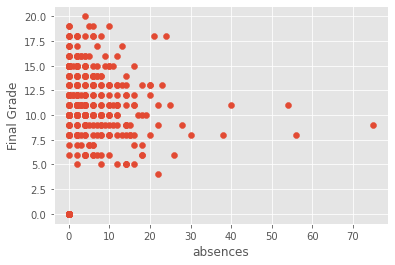

In [40]:
p = 'absences'
style.use('ggplot')
pyplot.scatter(data[p], data['G3'])
pyplot.xlabel(p)
pyplot.ylabel('Final Grade')
pyplot.show()